In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing lib
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import pickle

In [ ]:
# Loading data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# print data shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(x_train[0])

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
<class 'numpy.ndarray'>
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.

In [ ]:
# Classes tuple CIFAR10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') # tuple

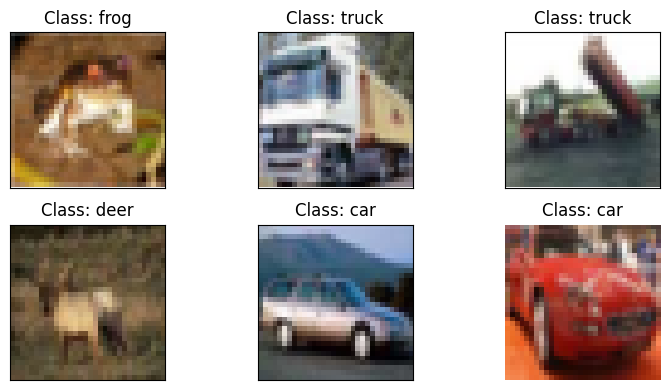

In [ ]:
# Visualization
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1, xticks=[], yticks=[])
    plt.imshow(x_train[i])
    class_name = classes[y_train[i].item()]
    plt.title(f"Class: {class_name}")
plt.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
#Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0
# One-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# Buidling model's architecture
model = keras.Sequential([
    # input: (32, 32, 3)
    # padding="same" -> output có cùng kích thước với input
    # convolution layer 1
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)), # (30, 30, 64)
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"), # (28, 28, 64)
    keras.layers.MaxPool2D(pool_size=(2, 2)), # (14, 14, 64)
    keras.layers.BatchNormalization(), # giảm hiện tượng gradient biến mất và gradient bùng nổ -> tăng tốc độ huấn luyện và khả năng tổng quát hóa của model
    # keras.layers.Dropout(0.5),
    # --> (14, 14, 64)
    # convolution layer 2
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"), # (14, 14, 128)
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"), # (12, 12, 128)
    keras.layers.MaxPool2D(pool_size=(2, 2)),  # (6, 6, 128)
    keras.layers.BatchNormalization(), # (6, 6, 128)
    # keras.layers.Dropout(0.5),
    # convolution layer 3
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu"),  # (4, 4, 256)
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu"),  # (2, 2, 256)
    keras.layers.MaxPool2D(pool_size=(2, 2)),  # (1, 1, 256)
    keras.layers.BatchNormalization(),  # (1, 1, 256)
    # keras.layers.Dropout(0.5),
    # Fully connected layer
    keras.layers.Flatten(), # --> (256, )
    keras.layers.Dense(512, activation="relu"), #--> (512, )
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),  # --> (10, )
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 2, 2, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283,914 (4.90 MB)

 Trainable params: 1,283,018 (4.89 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Model compile
loss = "categorical_crossentropy"
# initiate RMSprop optimizer (optional)
# opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
optimizer = "adam"
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
# Initialization hyperparameters
# data_augmentation = False
data_augmentation = True
epochs = 100
batch_size = 128
# Data augmentation
if not data_augmentation:
    print("Not using data augmentation!")
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split= 0.2,
                        shuffle=True)
else:
    print("Using data augmentation")
    datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                           height_shift_range=0.1,
                                                           horizontal_flip=True,
                                                           vertical_flip=True)
    datagen.fit(x_train)
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                                  epochs=epochs,
                                  validation_data=(x_test, y_test))

# Saving model.keras
save_dir = "./tmp/model"
save_path = os.path.join(save_dir, "mymodel_cifar.keras")
os.makedirs(save_dir, exist_ok=True)
model.save(save_path)
print(f"Model saved in {save_path}")
# Saving history pickle
with open("history_cifar10.pkl", "wb") as f:
    pickle.dump(history, f)


Using data augmentation
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 114ms/step - accuracy: 0.3166 - loss: 1.9324 - val_accuracy: 0.1489 - val_loss: 3.9529
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 96ms/step - accuracy: 0.5368 - loss: 1.2908 - val_accuracy: 0.5464 - val_loss: 1.3043
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.6259 - loss: 1.0618 - val_accuracy: 0.6176 - val_loss: 1.0832
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.6669 - loss: 0.9339 - val_accuracy: 0.6280 - val_loss: 1.1634
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.6953 - loss: 0.8676 - val_accuracy: 0.6323 - val_loss: 1.0669
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.7160 - loss: 0.8045 - val_accuracy: 0.6964 - val_loss: 0.9145
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.7380 - loss: 0.7491 - val_accuracy: 0.6921 - val_loss: 0.8834
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.7512 - loss: 0.7164 - val

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8516 - loss: 0.5315
Test loss: 0.5209755301475525
Test accuracy: 0.8503000140190125


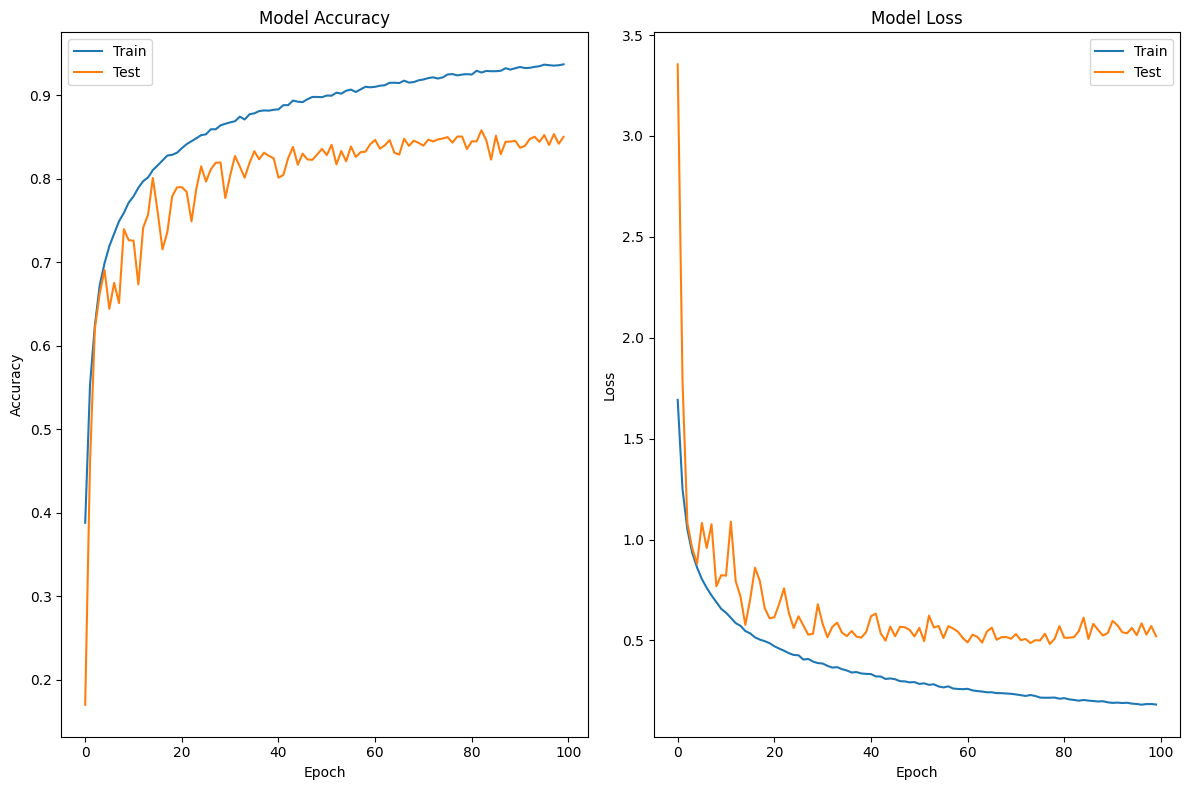

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].plot(history.history["accuracy"])
ax[0].plot(history.history["val_accuracy"])
ax[0].set_title("Model Accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].legend(["Train", "Test"], loc="best")

ax[1].plot(history.history["loss"])
ax[1].plot(history.history["val_loss"])
ax[1].set_title("Model Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")
ax[1].legend(["Train", "Test"], loc="best")
plt.tight_layout()
plt.show()

### Create new model with file .keras




In [ ]:
new_model = keras.models.load_model("/content/drive/MyDrive/mymodel_cifar.keras")
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 2, 2, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,849,952 (14.69 MB)

 Trainable params: 1,283,018 (4.89 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2,566,038 (9.79 MB)

### Compute Loss and Acc with new model


In [ ]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print("New_model --> Loss: {:.4f} || Accuracy: {:.4f}".format(loss, acc))

313/313 - 45s - 144ms/step - accuracy: 0.8566 - loss: 0.5222
New_model --> Loss: 0.5222 || Accuracy: 0.8566


In [ ]:
y_preds = new_model.predict(x_test)
print(y_preds.shape)
print(type(y_preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step
(10000, 10)
<class 'numpy.ndarray'>


In [ ]:
print(type(x_test[0]))
print(x_test[0].shape)

<class 'numpy.ndarray'>
(32, 32, 3)


In [ ]:
print(x_test.shape)
print(x_test[0].shape)
print(classes)

(10000, 32, 32, 3)
(32, 32, 3)
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
# classes[y_preds[0].item()]
print(y_preds[0])
id_max = y_preds[0].argmax()
print(id_max)
print(type(id_max))

[2.4136600e-06 1.6228629e-04 6.2999740e-04 9.9678075e-01 1.6337630e-05
 2.0412956e-03 3.2447960e-04 3.6475933e-05 3.4148993e-08 5.8099436e-06]
3
<class 'numpy.int64'>


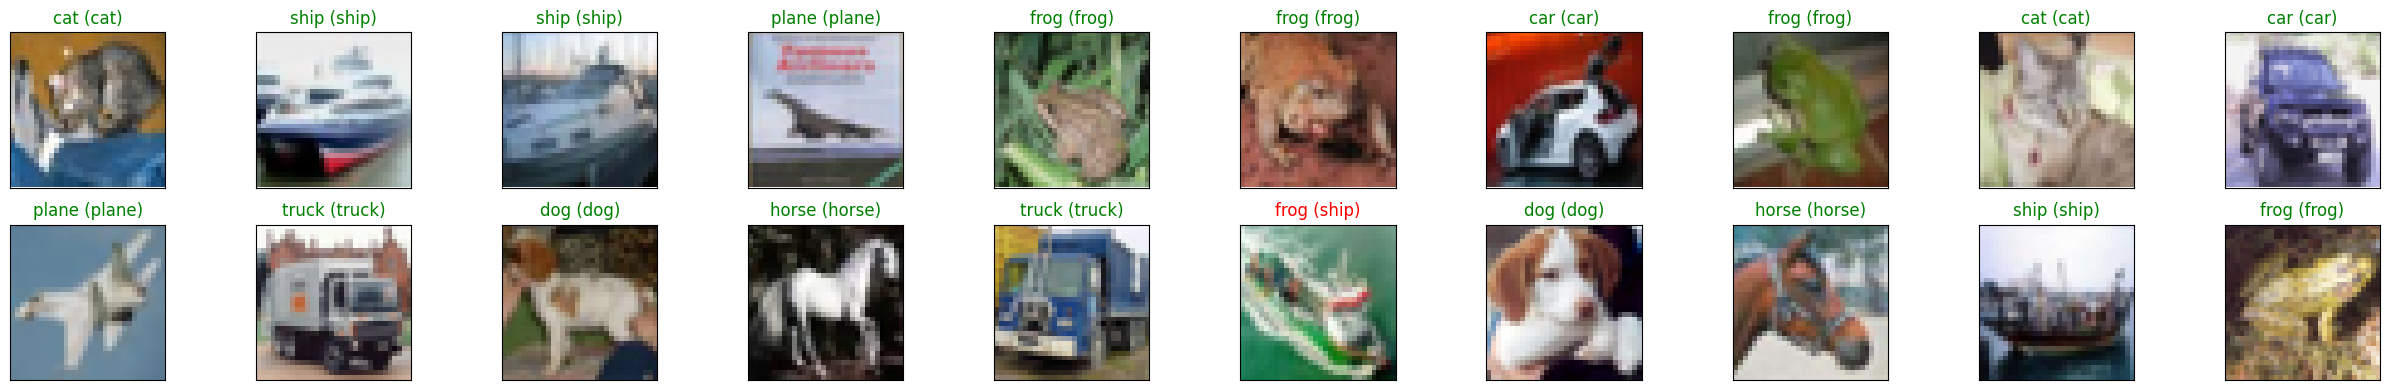

In [ ]:
plt.figure(figsize=(25, 4))
for i in range(20):
  plt.subplot(2, 10, i + 1, xticks = [], yticks = [])
  plt.imshow(x_test[i])
  id_max_preds = y_preds[i].argmax()
  id_max_test = y_test[i].argmax()
  plt.title("{} ({})".format(str(classes[id_max_preds]),
                             str(classes[id_max_test])),
                             color = ("green" if (id_max_preds == id_max_test) else "red"))
plt.tight_layout()
plt.show()

In [ ]:
import requests
from PIL import Image

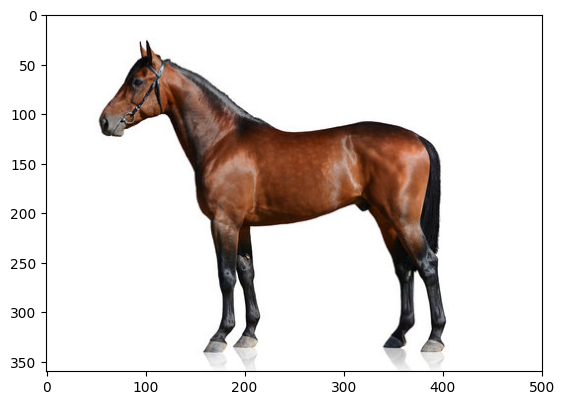

In [ ]:
# url = 'https://images.twinkl.co.uk/tw1n/image/private/t_630/u/ux/frog-2_ver_1.jpg'  # frog
url = 'https://t4.ftcdn.net/jpg/01/24/96/37/360_F_124963716_Rb81mdhUZrYgvnvuhIvjKQReZyORMLxe.jpg' # horse

response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

In [ ]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=630x473 at 0x7A56B84CFB20>


(32, 32, 3)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


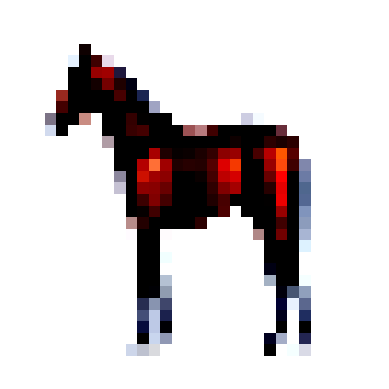

In [ ]:
def convert(img):
  img = img.resize((32, 32))
  # print(type(img))
  img = keras.utils.img_to_array(img)
  # Convert [0., 255.] to [0., 1.]
  img = img / 255.0
  # print(type(img))
  # Normalization for each channels RGB
  mean = np.array([0.4914, 0.4822, 0.4465])
  std = np.array([0.247, 0.243, 0.261])
  img = (img - mean) / std
  img = img.clip(0, 1)
  return img
converted_img = convert(img)
print(converted_img.shape)
print(converted_img)
plt.imshow(converted_img)
plt.axis("off")
plt.show()

In [ ]:
print(type(converted_img))
print(converted_img.shape)

<class 'numpy.ndarray'>
(32, 32, 3)


In [ ]:
x_test_check = np.expand_dims(x_test[0], 0)
print(x_test_check.shape)
print(x_test[0].shape)
print(x_test_check.squeeze().shape)

(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
horse


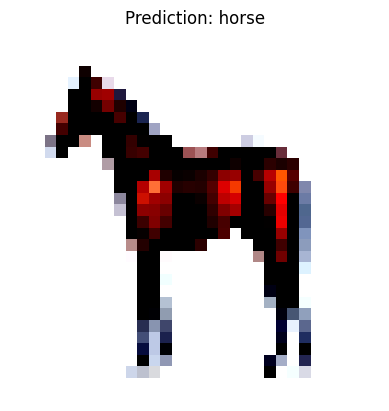

In [ ]:
# expand dims. (32, 32, 3) => (batch_size=1, 32, 32, 3)
converted_img = np.expand_dims(converted_img, 0)
# predict image with new_model
predicted_img = new_model.predict(converted_img)
# pick id_max
id_pred = predicted_img.argmax()
# print predicted class image
print(classes[id_pred])
# reduce first dimension = 1. (batch_size=1, 32, 32, 3) => (32, 32, 3)
plt.imshow(converted_img.squeeze())
plt.title(f"Prediction: {classes[id_pred]}")
plt.axis('off')
plt.show()